In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [2]:
import os
import requests
import csv
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'X', 'Y',  'Tipo']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

# Obtener una lista de fenotipos únicos
    fenotipos_unicos = df['Tipo'].unique().tolist()
    print("Fenotipos únicos:", fenotipos_unicos)

Contenido de high_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      28  15954.03297  10809.96703  non-immune cells
2     103  15728.93023  9802.246238       tumor cells
3     141  15872.66042  10464.04583  non-immune cells
4     193  16304.46779  10769.14976       tumor cells
Número de IDs distintos: 2311
Fenotipos únicos: ['phenotype', 'non-immune cells', 'tumor cells', 'M1 type macrophage', 'CD4 T cells', 'likely-NKT cells', 'dendritic cells', 'CD8 T cells', 'NKT cells', 'B cells', 'T cells']
Contenido de low_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      87  14793.98923  8843.229803       CD8 T cells
2     186  15204.70638  8889.964765  non-immune cells
3     208  14862.13941  9015.434316       CD4 T cells
4     274   15083.8345  8601.980365       CD8 T cells
Número de IDs distintos: 1265
Fenotipos únicos: ['phen

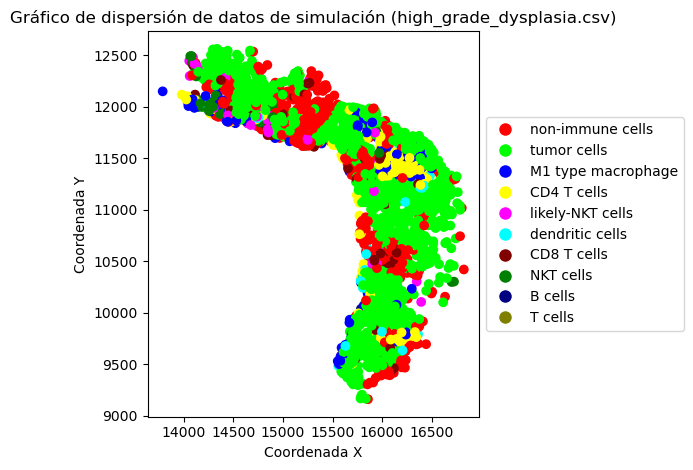

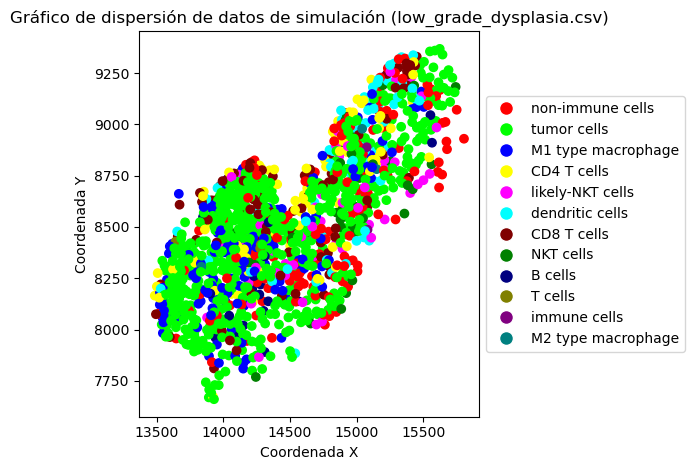

DataFrame 1:
      CellID   X_centroid    Y_centroid           phenotype
0         28  15954.03297  10809.967030    non-immune cells
1        103  15728.93023   9802.246238         tumor cells
2        141  15872.66042  10464.045830    non-immune cells
3        193  16304.46779  10769.149760         tumor cells
4        211  15953.36195  10027.702020         tumor cells
...      ...          ...           ...                 ...
2305   97168  16131.41600  11047.376000         tumor cells
2306   97297  15791.71667  11532.825000    non-immune cells
2307   97315  14218.91379  12106.672410  M1 type macrophage
2308   97411  15988.49351  10739.064940         tumor cells
2309   97454  14718.45161  11913.000000         tumor cells

[2310 rows x 4 columns]

DataFrame 2:
      CellID   X_centroid   Y_centroid         phenotype
0         87  14793.98923  8843.229803       CD8 T cells
1        186  15204.70638  8889.964765  non-immune cells
2        208  14862.13941  9015.434316       CD4 T cells


In [3]:
# Definir un diccionario de colores para cada fenotipo
color_map = {
    'non-immune cells': '#FF0000',  # Rojo
    'tumor cells': '#00FF00',       # Verde
    'M1 type macrophage': '#0000FF',  # Azul
    'CD4 T cells': '#FFFF00',       # Amarillo
    'likely-NKT cells': '#FF00FF',  # Magenta
    'dendritic cells': '#00FFFF',   # Cian
    'CD8 T cells': '#800000',       # Marrón
    'NKT cells': '#008000',         # Verde oscuro
    'B cells': '#000080',           # Azul marino
    'T cells': '#808000',           # Oliva
    'immune cells': '#800080',      # Púrpura
    'M2 type macrophage': '#008080',  # Verde azulado
    'lymphoid cells': '#FFA500'     # Naranja
}

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X, Y y el fenotipo
    X = df['X_centroid']
    Y = df['Y_centroid']
    fenotipo = df['phenotype']
    
    # Crear un mapa de colores basado en los fenotipos
    #unique_fenotipos = fenotipo.unique()
    #colors = plt.cm.get_cmap('hsv', len(unique_fenotipos))  # Usando una paleta de colores
    #color_map = {fenotipo: colors(i) for i, fenotipo in enumerate(unique_fenotipos)}
    
    # Asignar colores a cada punto según el fenotipo
    #colores_puntos = [color_map[t] for t in fenotipo]
      # Asignar colores a cada punto según el fenotipo
    colores_puntos = [color_map.get(t, '#000000') for t in fenotipo] 

    
    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos, label='Células')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')

    #plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
    #            markerfacecolor=color_map[key], markersize=10) for key in color_map])
    #plt.show()

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                       markerfacecolor=color, markersize=10) 
                       for key, color in color_map.items() if key in fenotipo.unique()]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada DataFrame
for df in dataframes:
    # Calcular la matriz de distancias
    matrix_distance = pdist(df[['X_centroid', 'Y_centroid']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

# Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

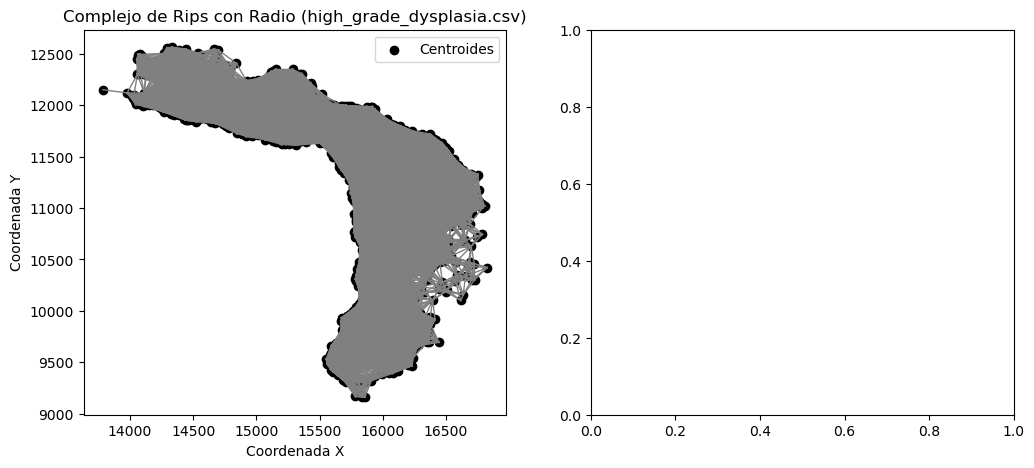

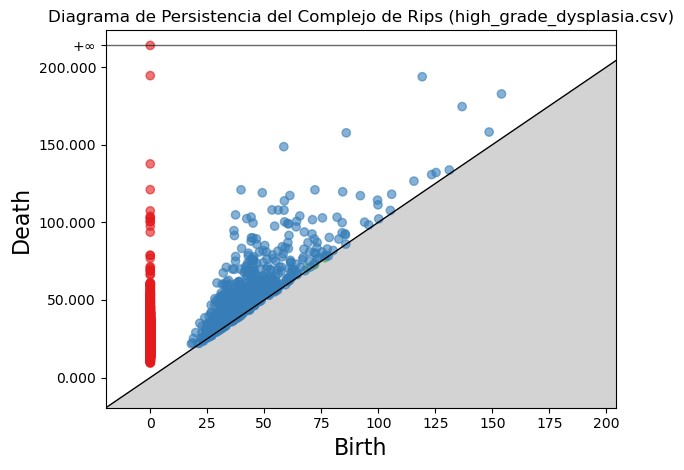

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells| Fenotipos Únicos de Vecinos: ['non-immune cells' 'tumor cells' 'CD4 T cells']
CellID: 103 tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'CD4 T cells' 'CD8 T cells' 'non-immune cells'
 'M1 type macrophage' 'dendritic cells']
CellID: 141 non-immune cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'CD4 T cells' 'likely-NKT cells' 'dendritic cells'
 'non-immune cells' 'CD8 T cells' 'M1 type macrophage']
CellID: 193 tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'non-immune cells']
CellID: 211 tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'M1 type macrophage' 'CD4 T cells' 'B cells' 'CD8 T cells'
 'non-immune cells']
CellID: 245 tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 251 tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'dendritic cells' 'M1 type macrophage' 'CD8 T cells'
 'CD4 T cells' 'non-immune cells']
CellID: 263 tumor cells| Fenotipos Únicos de Vecinos: ['

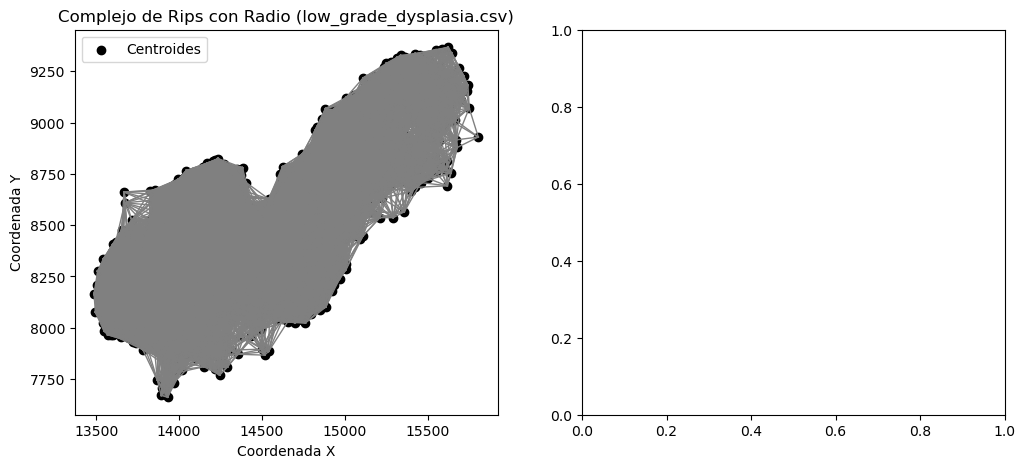

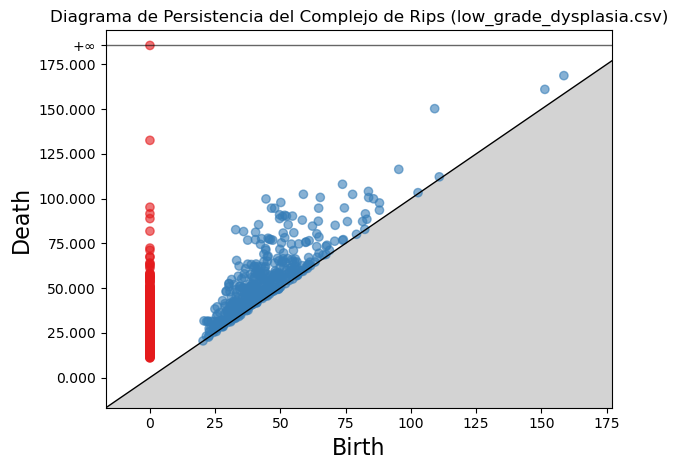

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells| Fenotipos Únicos de Vecinos: ['CD4 T cells' 'non-immune cells' 'tumor cells' 'CD8 T cells'
 'dendritic cells' 'NKT cells' 'likely-NKT cells' 'M1 type macrophage']
CellID: 186 non-immune cells| Fenotipos Únicos de Vecinos: ['non-immune cells' 'CD4 T cells' 'tumor cells' 'dendritic cells'
 'likely-NKT cells' 'NKT cells' 'M1 type macrophage' 'CD8 T cells'
 'immune cells' 'M2 type macrophage']
CellID: 208 CD4 T cells| Fenotipos Únicos de Vecinos: ['CD8 T cells' 'non-immune cells' 'CD4 T cells' 'tumor cells'
 'dendritic cells' 'NKT cells' 'likely-NKT cells' 'M1 type macrophage'
 'M2 type macrophage']
CellID: 274 CD8 T cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'non-immune cells' 'NKT cells' 'likely-NKT cells'
 'dendritic cells' 'M1 type macrophage' 'CD4 T cells' 'M2 type macrophage'
 'immune cells' 'CD8 T cells']
CellID: 387 non-immune cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'non-immune cells' 'CD4 T cells' 'CD8 T c

In [7]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas de los centroides
    X = df['X_centroid']
    Y = df['Y_centroid']
    
    # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
    puntos = np.array(list(zip(X, Y)))

    # Calcular el complejo de Rips con un radio específico
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=200)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    # Visualizar el complejo de Rips
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='black', label='Centroides')
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [X[i] for i in arista]
            y = [Y[i] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
    plt.legend()

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de dispersión de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
    plt.xlabel('Birth')
    plt.ylabel('Death')

    plt.tight_layout()
    plt.show()

  # ---- Nueva sección para calcular los vecinos ----
    # Usar un KDTree para calcular los vecinos de cada punto
    kdtree = KDTree(puntos)

    # Definir el radio para considerar a un punto como vecino
    radio_vecinos = 200  # El mismo radio utilizado para el complejo de Rips

    # Calcular los vecinos para cada punto dentro del radio
    vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

    # Mostrar resultados para cada célula
    print(f'Archivo: {archivo_csv}')
    for i, celula_vecinos in enumerate(vecinos):
        # Remover la célula en sí misma de la lista de vecinos
        celula_vecinos = [idx for idx in celula_vecinos if idx != i]
        
        # Obtener los fenotipos de los vecinos
        fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].unique()
        
        print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]}| Fenotipos Únicos de Vecinos: {fenotipos_vecinos}')
    print('-----------------------------------------\n')


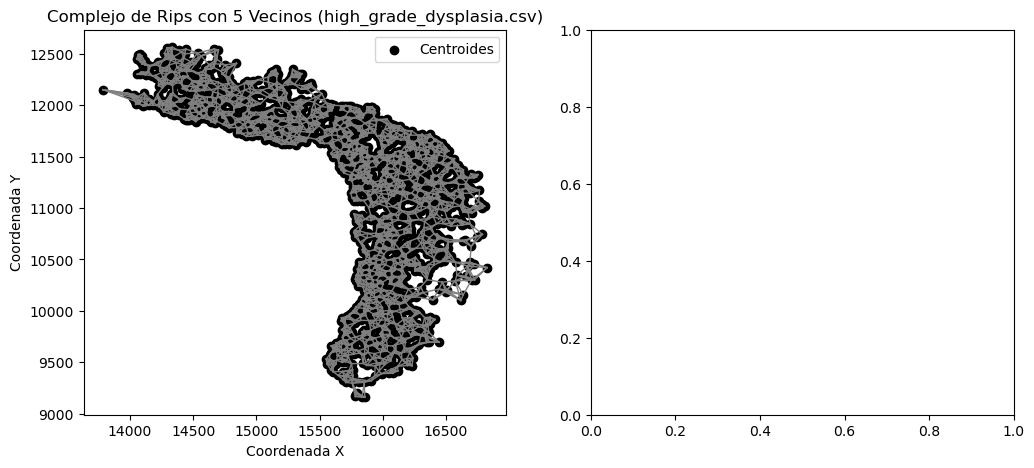

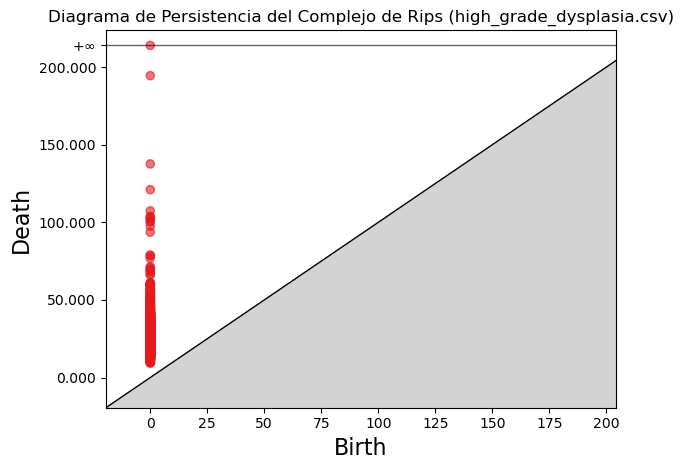

Archivo: high_grade_dysplasia.csv
CellID: 28  non-immune cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'non-immune cells']
CellID: 103  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'CD8 T cells']
CellID: 141  non-immune cells| Fenotipos Únicos de Vecinos: ['dendritic cells' 'CD4 T cells' 'likely-NKT cells' 'tumor cells']
CellID: 193  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 211  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 245  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 251  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 263  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 278  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 371  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 399  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 405  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'non-immune cells' 'li

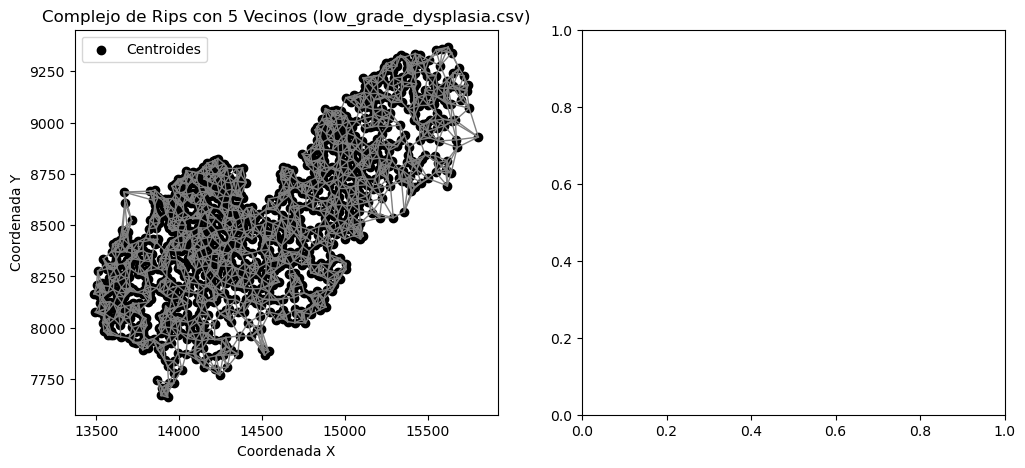

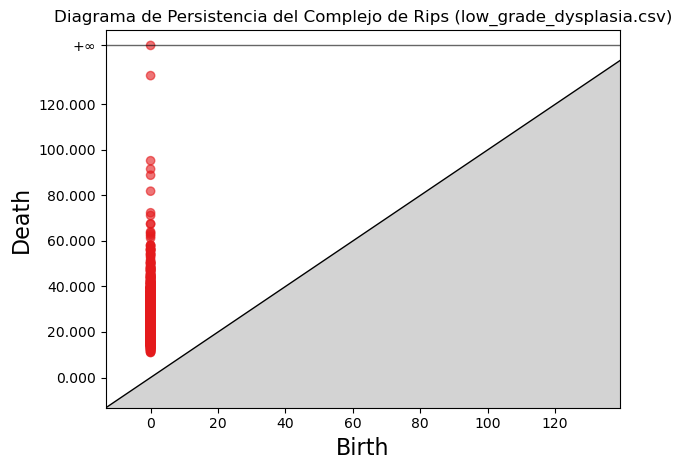

Archivo: low_grade_dysplasia.csv
CellID: 87  CD8 T cells| Fenotipos Únicos de Vecinos: ['dendritic cells' 'CD4 T cells' 'M1 type macrophage']
CellID: 186  non-immune cells| Fenotipos Únicos de Vecinos: ['M1 type macrophage' 'CD4 T cells' 'dendritic cells' 'tumor cells'
 'CD8 T cells']
CellID: 208  CD4 T cells| Fenotipos Únicos de Vecinos: ['non-immune cells' 'dendritic cells']
CellID: 274  CD8 T cells| Fenotipos Únicos de Vecinos: ['CD8 T cells' 'tumor cells' 'non-immune cells']
CellID: 387  non-immune cells| Fenotipos Únicos de Vecinos: ['non-immune cells' 'tumor cells']
CellID: 486  tumor cells| Fenotipos Únicos de Vecinos: ['likely-NKT cells' 'B cells' 'tumor cells' 'non-immune cells']
CellID: 488  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 516  tumor cells| Fenotipos Únicos de Vecinos: ['tumor cells' 'dendritic cells']
CellID: 625  non-immune cells| Fenotipos Únicos de Vecinos: ['likely-NKT cells' 'tumor cells' 'NKT cells' 'non-immune cells']
CellID: 722  M1 

In [9]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Definir el número de vecinos a considerar
num_vecinos_a_considerar = 5  # Cambia este valor según lo que necesites

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas de los centroides
    X = df['X_centroid']
    Y = df['Y_centroid']
    
    # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
    puntos = np.array(list(zip(X, Y)))

    # Usar un KDTree para calcular los vecinos de cada punto
    kdtree = KDTree(puntos)

    # Calcular los 'num_vecinos_a_considerar' vecinos más cercanos para cada punto
    distancias, indices_vecinos = kdtree.query(puntos, k=num_vecinos_a_considerar + 1)

    # Crear el complejo de Rips manualmente usando los vecinos más cercanos
    simplex_tree = gd.SimplexTree()
    
    for i, vecinos in enumerate(indices_vecinos):
        # Remover la célula en sí misma de la lista de vecinos (índice 0)
        vecinos = vecinos[1:]
        
        # Añadir el punto individualmente como un 0-simplejo
        simplex_tree.insert([i])
        
        # Añadir las aristas entre la célula y sus vecinos
        for vecino in vecinos:
            simplex_tree.insert([i, vecino], filtration=distancias[i][vecinos.tolist().index(vecino) + 1])

    # Visualizar el complejo de Rips
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='black', label='Centroides')
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [X[i] for i in arista]
            y = [Y[i] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Complejo de Rips con {num_vecinos_a_considerar} Vecinos ({archivo_csv})')
    plt.legend()

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de dispersión de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
    plt.xlabel('Birth')
    plt.ylabel('Death')

    plt.tight_layout()
    plt.show()

    # ---- Sección para calcular los fenotipos de los vecinos ----
    print(f'Archivo: {archivo_csv}')
    for i, vecinos in enumerate(indices_vecinos):
        # Remover la célula en sí misma de la lista de vecinos (índice 0)
        vecinos = vecinos[1:]
        
        # Obtener los fenotipos de los vecinos
        fenotipos_vecinos = df.loc[vecinos, 'phenotype'].unique()
        
        print(f'CellID: {df["CellID"].iloc[i]}  {df["phenotype"].iloc[i]}| Fenotipos Únicos de Vecinos: {fenotipos_vecinos}')
    print('-----------------------------------------\n')


In [14]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def analizar_vecinos_y_complejo(ruta_directorio, radio_vecinos=200, max_edge_length=200):
    """
    Analiza los vecinos y genera el complejo de Rips para los archivos CSV en un directorio dado.
    
    Parámetros:
    - ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    - radio_vecinos: Radio para calcular los vecinos de cada punto.
    - max_edge_length: Radio máximo para el cálculo del complejo de Rips.
    """
    
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # ---- Sección para calcular los vecinos ----
        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Calcular los vecinos para cada punto dentro del radio
        vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

        # Mostrar resultados para cada célula
        print(f'Archivo: {archivo_csv}')
        for i, celula_vecinos in enumerate(vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            
            # Obtener los fenotipos de los vecinos
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].unique()
            
            print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos Únicos de Vecinos: {fenotipos_vecinos}')
        print('-----------------------------------------\n')


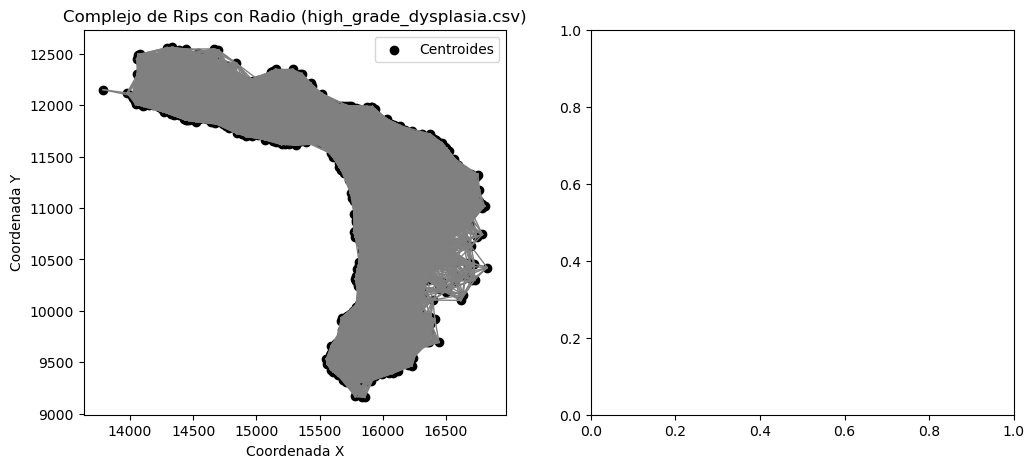

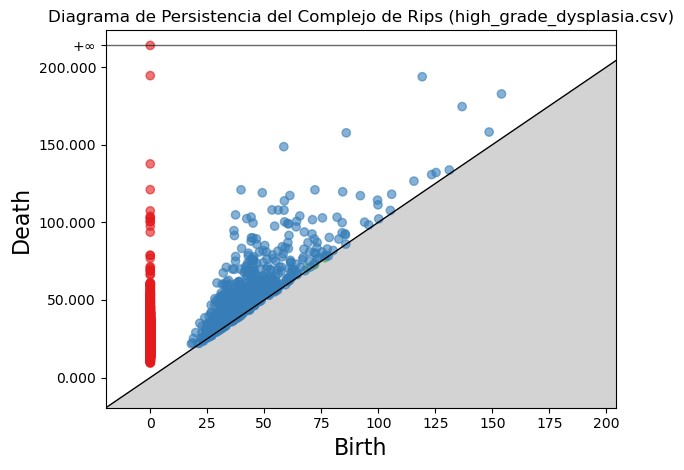

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 103 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 141 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 193 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 211 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 245 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 251 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 263 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 278 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 371 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 399 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 405 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 425 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 481 M1 type macrophage | Fenotipos Únicos de Vecinos: []
CellID: 536 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 775 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 781 non-immune

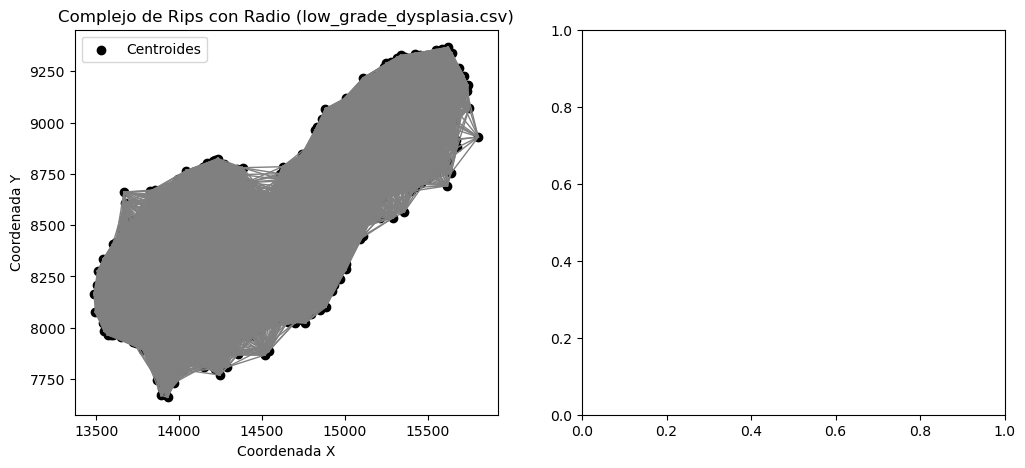

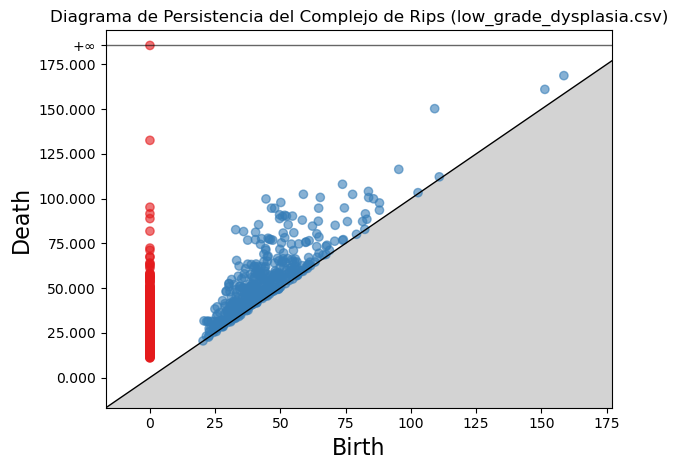

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells | Fenotipos Únicos de Vecinos: []
CellID: 186 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 208 CD4 T cells | Fenotipos Únicos de Vecinos: []
CellID: 274 CD8 T cells | Fenotipos Únicos de Vecinos: []
CellID: 387 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 486 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 488 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 516 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 625 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 722 M1 type macrophage | Fenotipos Únicos de Vecinos: []
CellID: 748 dendritic cells | Fenotipos Únicos de Vecinos: []
CellID: 843 tumor cells | Fenotipos Únicos de Vecinos: []
CellID: 938 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 1110 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 1126 non-immune cells | Fenotipos Únicos de Vecinos: []
CellID: 1194 CD4 T cells | Fenotipos Únicos de Vecinos:

In [15]:
analizar_vecinos_y_complejo(ruta_directorio="/home/jupyter-user5/multicellularity_patterns_classification-/datos_c", radio_vecinos=8, max_edge_length=250)


In [16]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def analizar_vecinos_y_complejo(ruta_directorio, num_vecinos=5, max_edge_length=200):
    """
    Analiza los vecinos y genera el complejo de Rips para los archivos CSV en un directorio dado.
    
    Parámetros:
    - ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    - num_vecinos: Número de vecinos más cercanos a considerar para cada célula.
    - max_edge_length: Radio máximo para el cálculo del complejo de Rips.
    """
    
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # ---- Sección para calcular los vecinos más cercanos ----
        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Calcular los vecinos más cercanos (k-vecinos) para cada punto
        distancias, indices_vecinos = kdtree.query(puntos, k=num_vecinos + 1)  # Incluye el propio punto

        # Mostrar resultados para cada célula
        print(f'Archivo: {archivo_csv}')
        for i, vecinos in enumerate(indices_vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = vecinos[vecinos != i]
            
            # Obtener los fenotipos de los vecinos
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].unique()
            
            print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos Únicos de Vecinos: {fenotipos_vecinos}')
        print('-----------------------------------------\n')


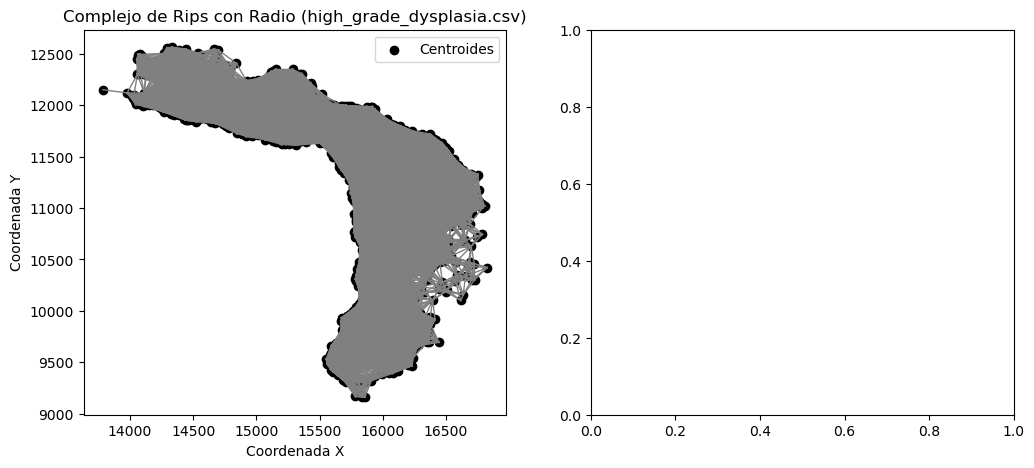

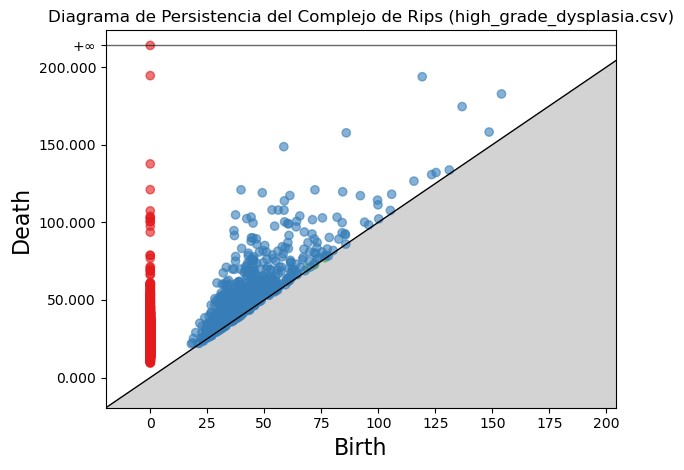

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells | Fenotipos Únicos de Vecinos: ['tumor cells' 'non-immune cells']
CellID: 103 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells' 'CD8 T cells']
CellID: 141 non-immune cells | Fenotipos Únicos de Vecinos: ['dendritic cells' 'CD4 T cells' 'likely-NKT cells' 'tumor cells']
CellID: 193 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 211 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 245 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 251 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 263 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells' 'CD4 T cells']
CellID: 278 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 371 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells']
CellID: 399 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells' 'dendritic cells']
CellID: 405 tumor cells | Fenotipos Únicos de Vecinos: ['tum

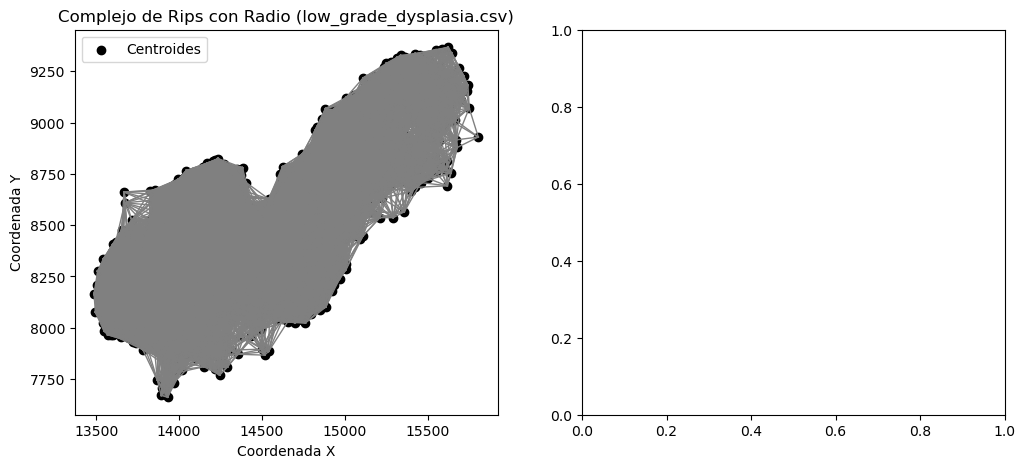

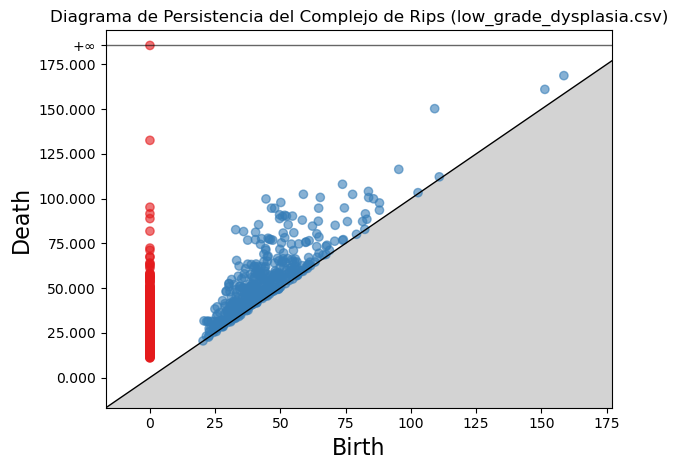

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells | Fenotipos Únicos de Vecinos: ['dendritic cells' 'CD4 T cells' 'M1 type macrophage' 'tumor cells']
CellID: 186 non-immune cells | Fenotipos Únicos de Vecinos: ['M1 type macrophage' 'CD4 T cells' 'dendritic cells' 'tumor cells'
 'CD8 T cells' 'likely-NKT cells']
CellID: 208 CD4 T cells | Fenotipos Únicos de Vecinos: ['non-immune cells' 'dendritic cells' 'likely-NKT cells' 'NKT cells']
CellID: 274 CD8 T cells | Fenotipos Únicos de Vecinos: ['CD8 T cells' 'tumor cells' 'non-immune cells']
CellID: 387 non-immune cells | Fenotipos Únicos de Vecinos: ['non-immune cells' 'tumor cells']
CellID: 486 tumor cells | Fenotipos Únicos de Vecinos: ['likely-NKT cells' 'B cells' 'tumor cells' 'non-immune cells']
CellID: 488 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells' 'NKT cells']
CellID: 516 tumor cells | Fenotipos Únicos de Vecinos: ['tumor cells' 'dendritic cells' 'non-immune cells']
CellID: 625 non-immune cells | Fenotipos Únicos

In [17]:
analizar_vecinos_y_complejo(ruta_directorio="/home/jupyter-user5/multicellularity_patterns_classification-/datos_c", num_vecinos=8, max_edge_length=200)